In [8]:
#upload the csv file
from google.colab import files
uploaded = files.upload()

import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Saving cookie_cats[1].csv to cookie_cats[1] (4).csv


In [9]:
def eda(df):
    # Basic information about the dataset
    print("Number of rows:", len(df))
    print("Number of columns:", len(df.columns))
    print("Columns:", df.columns.tolist())
    print("\n")
    
    # Summary statistics for numeric columns
    print("Summary Statistics for Numeric Columns:")
    print(df.describe(include=[np.number]))
    print("\n")
    
    # Summary statistics for categorical columns
    print("Summary Statistics for Categorical Columns:")
    print(df.describe(include=[np.object]))
    print("\n")
    
    # Missing values
    print("Missing Values:")
    print(df.isnull().sum())
    print("\n")
    
    # Distribution plots for numeric columns
    print("Distribution Plots for Numeric Columns:")
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in num_cols:
        plt.figure()
        sns.distplot(df[col], kde=False)
        plt.title(col)
        plt.show()
        
    # Box plots or violin plots for categorical columns
    print("Box Plots/Violin Plots for Categorical Columns:")
    cat_cols = df.select_dtypes(include=[np.object]).columns.tolist()
    for col in cat_cols:
        plt.figure()
        sns.boxplot(x=col, y=num_cols[0], data=df)
        plt.title(col)
        plt.show()
    
    # Pair plots for numeric columns
    print("Pair Plots for Numeric Columns:")
    sns.pairplot(df[num_cols])
    plt.show()
    
    # Count plots for categorical columns
    print("Count Plots for Categorical Columns:")
    for col in cat_cols:
        plt.figure()
        sns.countplot(x=col, data=df)
        plt.title(col)
        plt.show()
    
    # Correlation heatmap
    print("Correlation Heatmap:")
    corr = df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.show()

    # Find duplicate rows
    duplicate_rows = df[df.duplicated(keep=False)]

    # Print the duplicate rows
    print(duplicate_rows)

    # Call the count_duplicates() function and print the result
    num_duplicates, duplicate_values = count_duplicates(df)
    print("Number of duplicate values for each column:\n", num_duplicates)
    print("Duplicate values for each column:\n", duplicate_values)

In [13]:
fl_name = 'cookie_cats[1].csv'
raw_dt = pd.read_csv(fl_name)

raw_dt.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Number of rows: 90189
Number of columns: 5
Columns: ['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7']


Summary Statistics for Numeric Columns:
             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2.883286e+06      195.050858
min    1.160000e+02        0.000000
25%    2.512230e+06        5.000000
50%    4.995815e+06       16.000000
75%    7.496452e+06       51.000000
max    9.999861e+06    49854.000000


Summary Statistics for Categorical Columns:
        version
count     90189
unique        2
top     gate_40
freq      45489


Missing Values:
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64


Distribution Plots for Numeric Columns:


<ipython-input-9-57c9c659e824>:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df.describe(include=[np.object]))
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


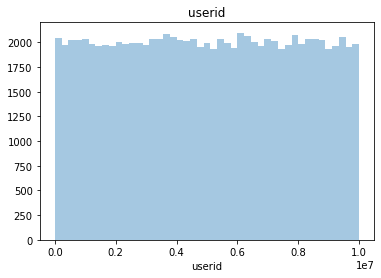

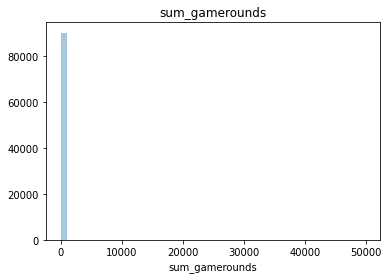

Box Plots/Violin Plots for Categorical Columns:


<ipython-input-9-57c9c659e824>:34: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = df.select_dtypes(include=[np.object]).columns.tolist()


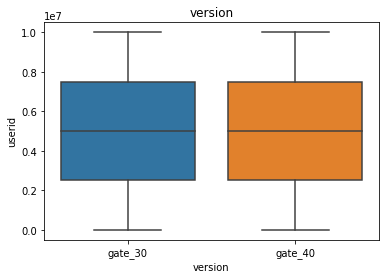

Pair Plots for Numeric Columns:


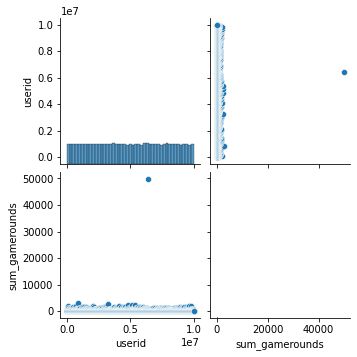

Count Plots for Categorical Columns:


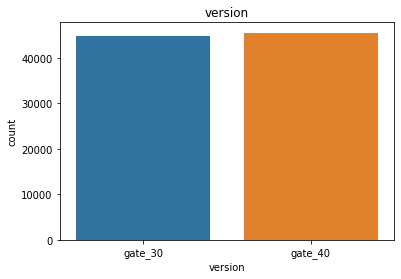

Correlation Heatmap:


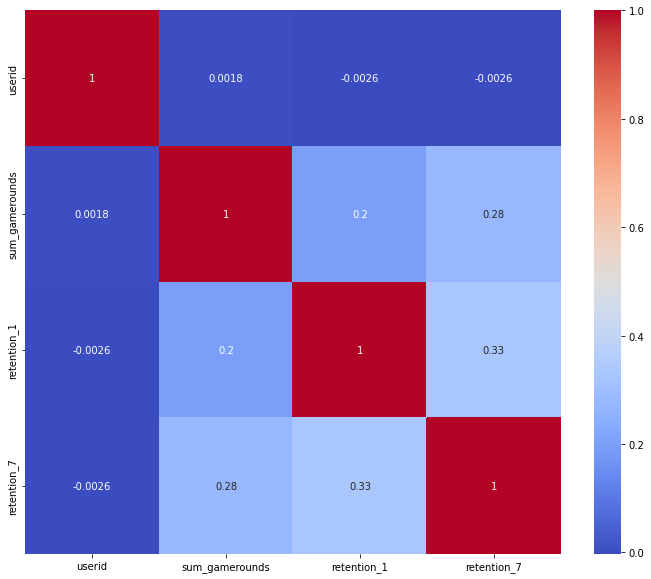

In [14]:
eda(raw_dt)

In [18]:
from scipy.stats import ttest_ind

# Load the data
data = raw_dt

# Perform A/B test for one day retention
control_retention_1 = data[data["version"] == "gate_30"]["retention_1"]
test_retention_1 = data[data["version"] == "gate_40"]["retention_1"]
t_stat_1, p_value_1 = ttest_ind(control_retention_1, test_retention_1)

# Perform A/B test for seven day retention
control_retention_7 = data[data["version"] == "gate_30"]["retention_7"]
test_retention_7 = data[data["version"] == "gate_40"]["retention_7"]
t_stat_7, p_value_7 = ttest_ind(control_retention_7, test_retention_7)

# Print the results
print("One day retention - T-statistic:", t_stat_1)
print("One day retention - P-value:", p_value_1)
if p_value_1 < 0.05:
    print("One day retention - The difference in means is statistically significant at the 95% confidence level.")
else:
    print("One day retention - The difference in means is not statistically significant at the 95% confidence level.")

print("Seven day retention - T-statistic:", t_stat_7)
print("Seven day retention - P-value:", p_value_7)
if p_value_7 < 0.05:
    print("Seven day retention - The difference in means is statistically significant at the 95% confidence level.")
else:
    print("Seven day retention - The difference in means is not statistically significant at the 95% confidence level.")


One day retention - T-statistic: 1.7840979256519656
One day retention - P-value: 0.07441111525563184
One day retention - The difference in means is not statistically significant at the 95% confidence level.
Seven day retention - T-statistic: 3.1644994996802778
Seven day retention - P-value: 0.0015540151201088365
Seven day retention - The difference in means is statistically significant at the 95% confidence level.


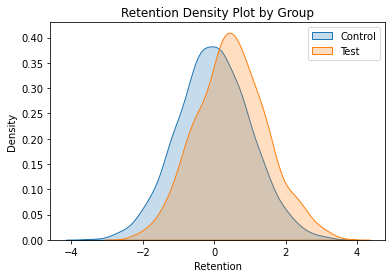

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a sample dataframe with group information and retention data
df = pd.DataFrame({'version': ['gate_30']*1000 + ['gate_40']*1000,
                   'retention_1': np.concatenate([np.random.normal(0, 1, 1000),
                                                   np.random.normal(0.5, 1, 1000)])})

# filter the data for the control and test groups
control_data = df[df['version'] == 'gate_30']['retention_1']
test_data = df[df['version'] == 'gate_40']['retention_1']

# create a density plot using seaborn
sns.kdeplot(control_data, shade=True, label='Control')
sns.kdeplot(test_data, shade=True, label='Test')
plt.xlabel('Retention')
plt.ylabel('Density')
plt.title('Retention Density Plot by Group')
plt.legend()
plt.show()